#### *Copyright 2021 The Cirq Developers*

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/tutorials/cirq-superstaq/getting_started"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/tutorials/cirq-superstaq/getting_started_cirq_superstaq.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/cirq-superstaq/getting_started_cirq_superstaq.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/tutorials/cirq-superstaq/getting_started_cirq_superstaq.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

# Running on IBM Q with Cirq-SuperstaQ

Please note that Python version `3.7` or higher is required. Creating and submitting a circuit to IBM Q through Cirq-SuperstaQ requires API access tokens obtained at https://superstaq.super.tech and https://quantum-computing.ibm.com/.

In [2]:
import cirq.cirq_superstaq as cirq_superstaq

### Build a Cirq Circuit

Build a circuit, e.g., to generate a Bell state $$\lvert\psi\rangle = \frac{1}{\sqrt{2}}\lvert00\rangle + \frac{1}{\sqrt{2}}\rvert11\rangle$$ with the following:

In [3]:
q0 = cirq.LineQubit(0)
q1 = cirq.LineQubit(1)
circuit = cirq.Circuit(cirq.H(q0), cirq.CNOT(q0, q1), cirq.measure(q0))
print(circuit)

0: ───H───@───M───
          │
1: ───────X───────


### Use SuperstaQ Credentials to Run a Job

SuperstaQ offers access [IBM Q](https://www.ibm.com/quantum-computing/). To obtain your API access token, login to https://superstaq.super.tech/ and copy the value labled `Superstaq API token` (as seen in the section boxed in red):

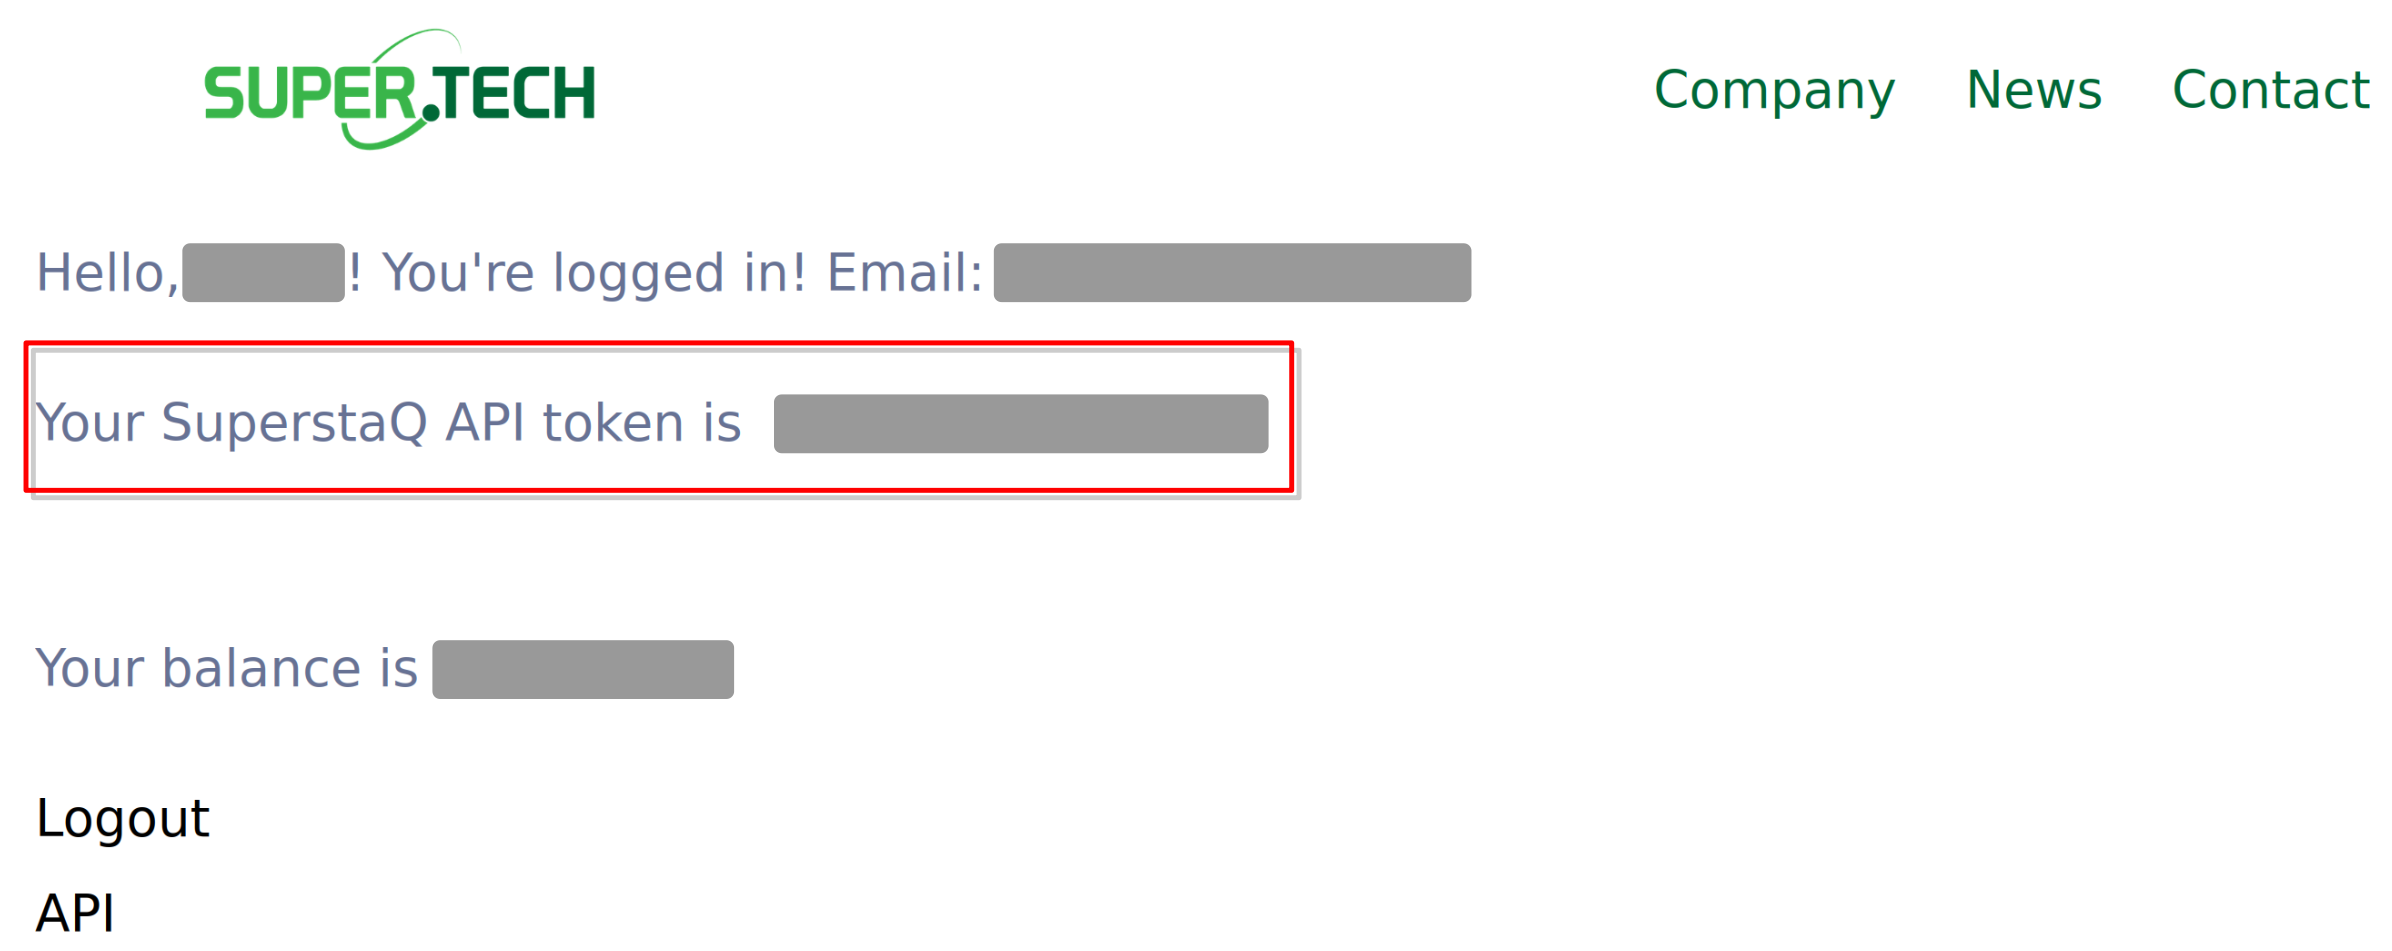

To obtain your IBM Q access token, login to https://quantum-computing.ibm.com/ and copy the value labeled `Your API token` (as seen in the section boxed in red):

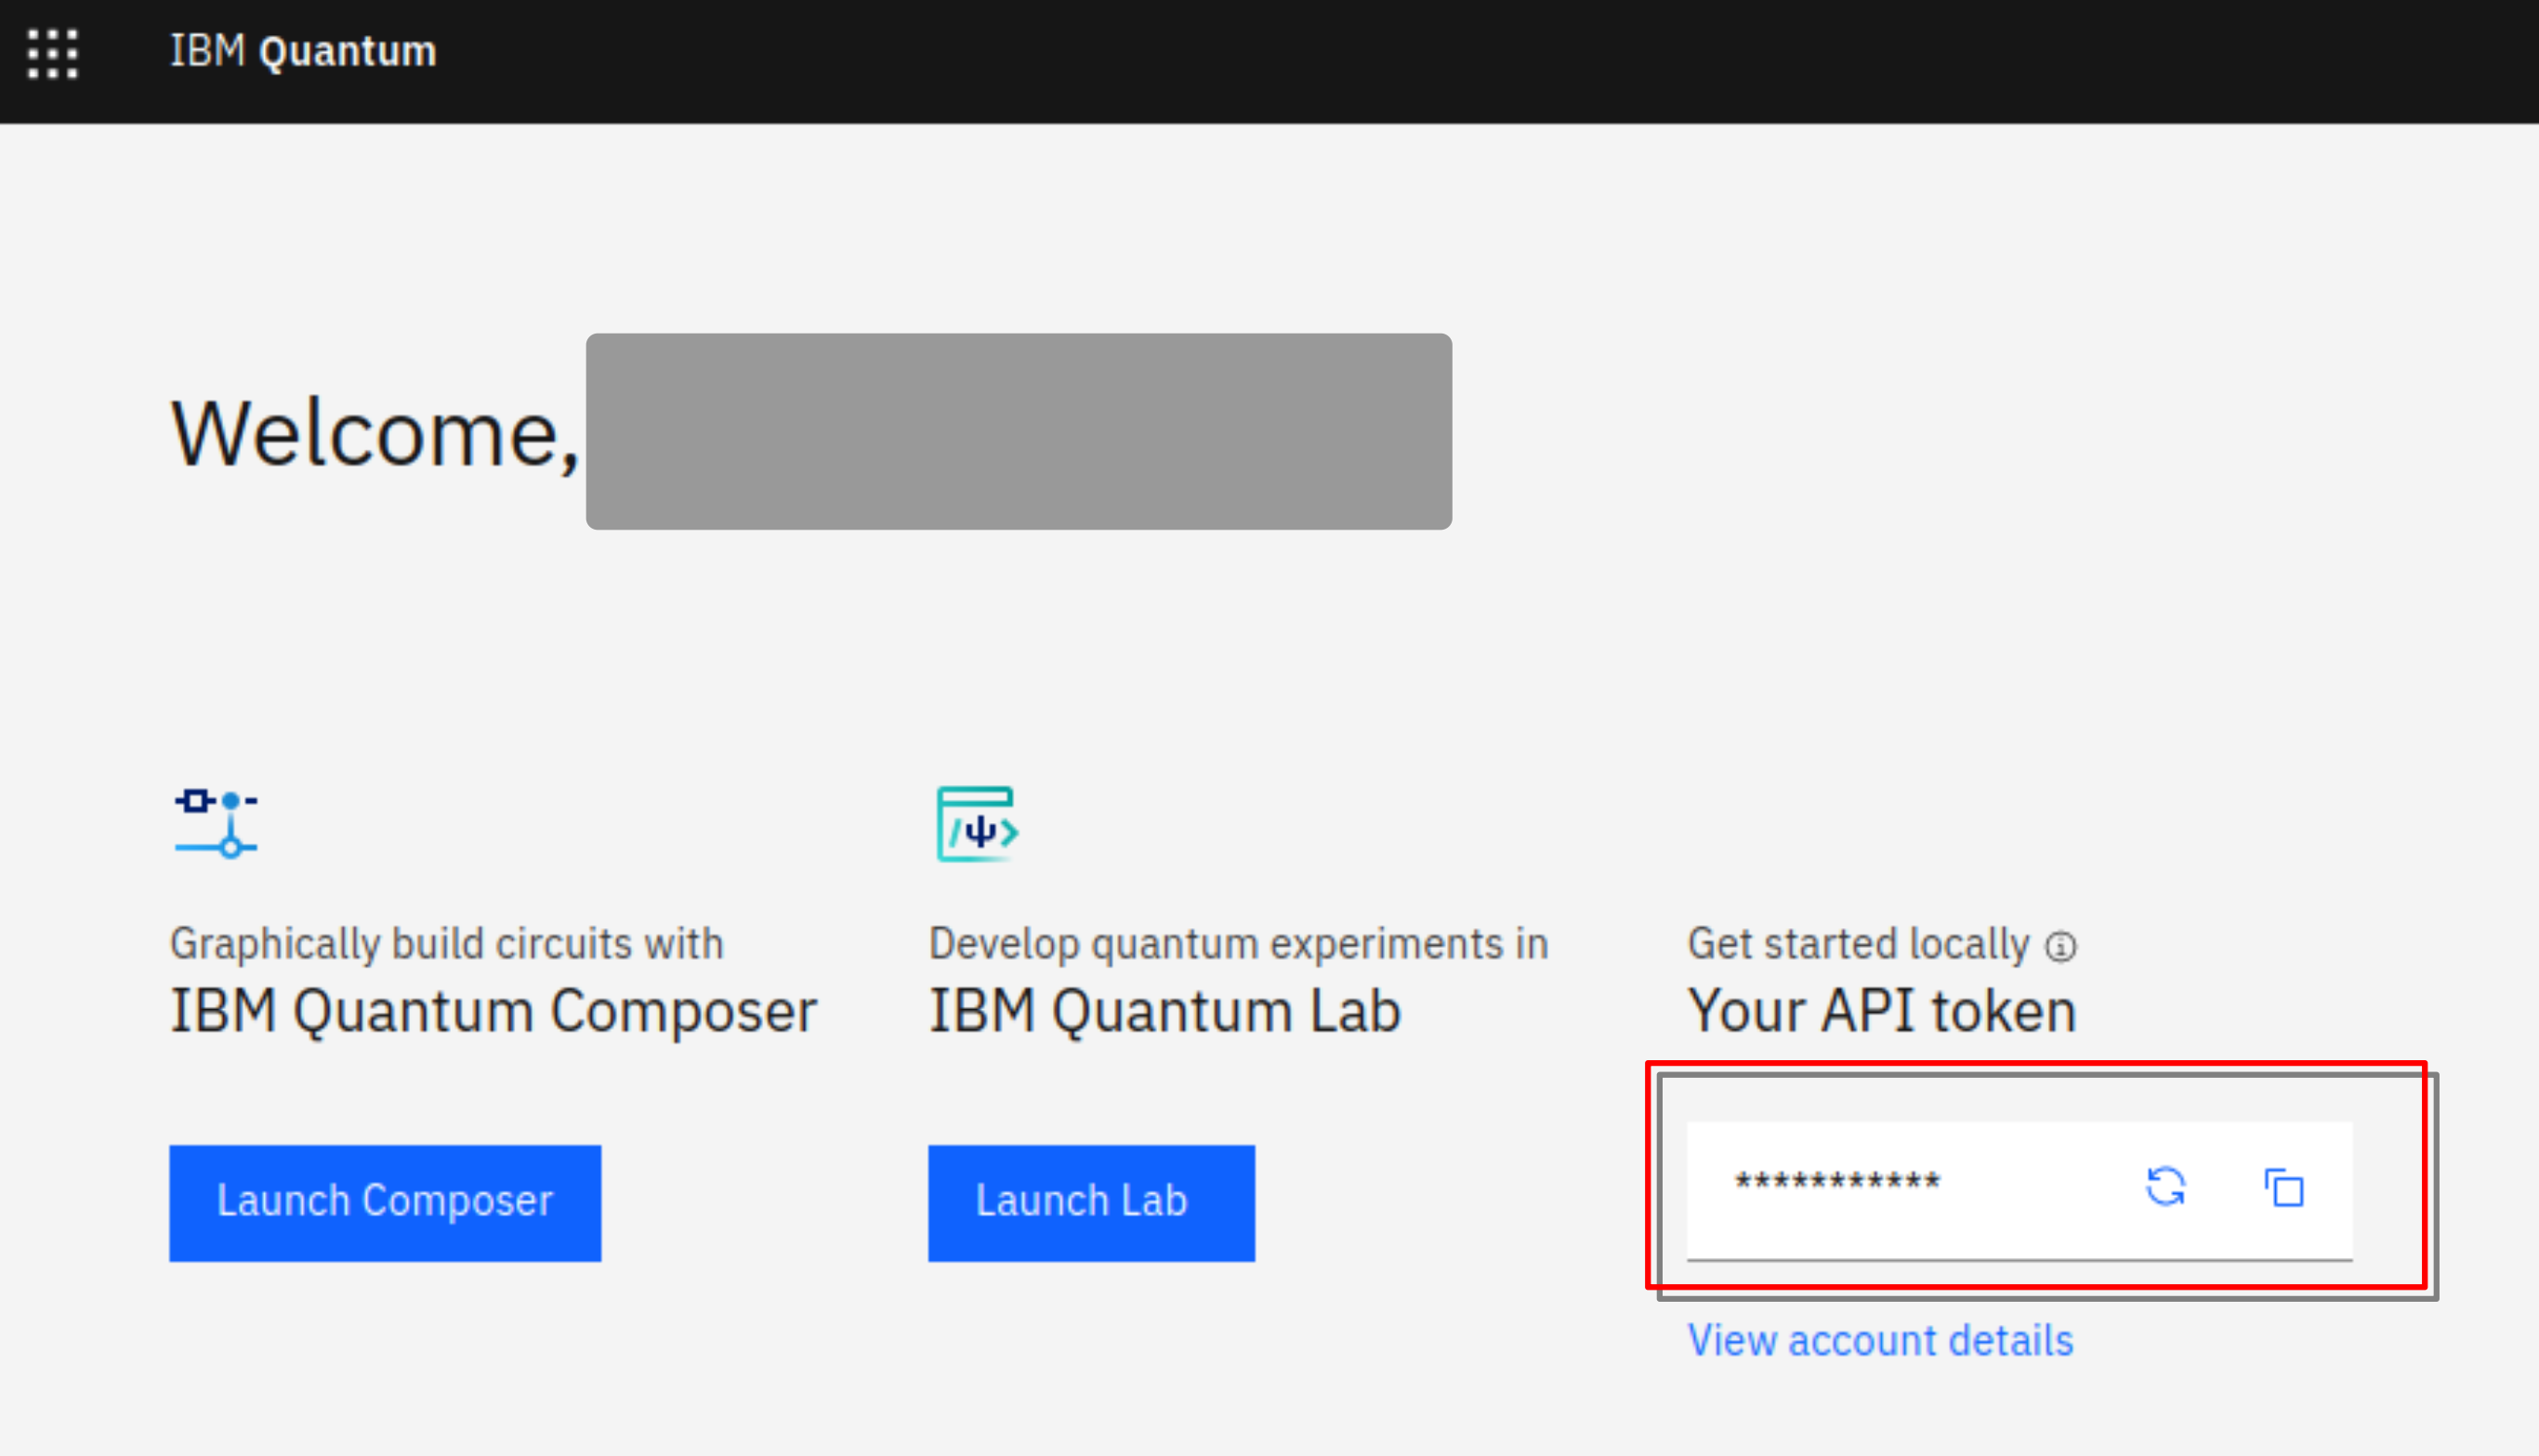

Paste your SuperstaQ API token value into the `api_key` field of the `cirq_superstaq.Service` constructor below. Paste your IBM Q token value into the `ibmq_token` field. You can run a job on a specified target device (e.g., here `ibm_qasm_simulator` is used as the target device).

In [20]:
service = cirq_superstaq.Service(
    api_key = """Insert SuperstaQ token that you received from https://superstaq.super.tech""",
    ibmq_token = """Insert IBM Q token that you received from https://quantum-computing.ibm.com/""",
    verbose=True,
)

In [23]:
job = service.create_job(circuit=circuit, repetitions=1, target="ibmq_qasm_simulator")
print("Job status: ", job.status())
print(job.counts())

Job status:  Done
{'0': 1}
